Content
The dataset contains 65,521 unique entries with the following columns:

appid: Unique identifier for each game on Steam.
name: The title of the game.
release_date: The release date (includes future releases scheduled for 2025).
price: Current price of the game (in USD).
genres: Comma-separated list of genres defined by developers (e.g., Action, Indie).
categories: Features supported by the game (e.g., Single-player, Full controller support).
developer: The name of the game developer.
publisher: The name of the publisher.
recommendations: Number of user recommendations (indicates popularity).
Key Features
Up-to-date: Includes recent releases and scheduled titles for late 2025.
Granular Tags: Rich information on genres and categories allows for deep multi-label classification analysis.
Pricing Data: Useful for analyzing monetization models (Free to Play vs. Premium).
Inspiration
Here are some research questions to get you started:

Trend Analysis: How has the market share of "Indie" games changed from 2021 to 2025?
Pricing Strategy: Is there a correlation between price and user recommendations?
Genre Evolution: Which genres are growing the fastest in 2025?
Release Patterns: Which months have the highest number of game releases?

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os
from sqlalchemy.types import NVARCHAR
from sqlalchemy import create_engine

Read Five Data

In [206]:
df = pd.read_csv("a_steam_data_2021_2025.csv", encoding="utf-8")
df.head()

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues


In [207]:
print(f"Row of the dataset: {df.shape[0]}")
print(f"Column of the dataset: {df.shape[1]}")

Row of the dataset: 65521
Column of the dataset: 10


In [208]:
df.describe()

,appid,release_year,price,recommendations
count,6.552100e+04,65521.000000,65521.000000,65521.000000
mean,2.580607e+06,2023.453091,7.204043,362.165336
std,7.692480e+05,1.386641,16.914429,6936.837198
min,1.200220e+06,2021.000000,0.000000,0.000000
25%,1.916970e+06,2022.000000,0.990000,0.000000
50%,2.516050e+06,2024.000000,3.990000,0.000000
75%,3.193800e+06,2025.000000,9.740000,0.000000
max,4.243930e+06,2025.000000,1900.000000,862487.000000


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65521 entries, 0 to 65520
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            65521 non-null  int64  
 1   name             65521 non-null  object 
 2   release_year     65521 non-null  int64  
 3   release_date     65521 non-null  object 
 4   genres           65455 non-null  object 
 5   categories       65514 non-null  object 
 6   price            65521 non-null  float64
 7   recommendations  65521 non-null  int64  
 8   developer        65468 non-null  object 
 9   publisher        65338 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 5.0+ MB


In [210]:
df.isnull().sum()

appid                0
name                 0
release_year         0
release_date         0
genres              66
categories           7
price                0
recommendations      0
developer           53
publisher          183
dtype: int64

Visualization Missing Values

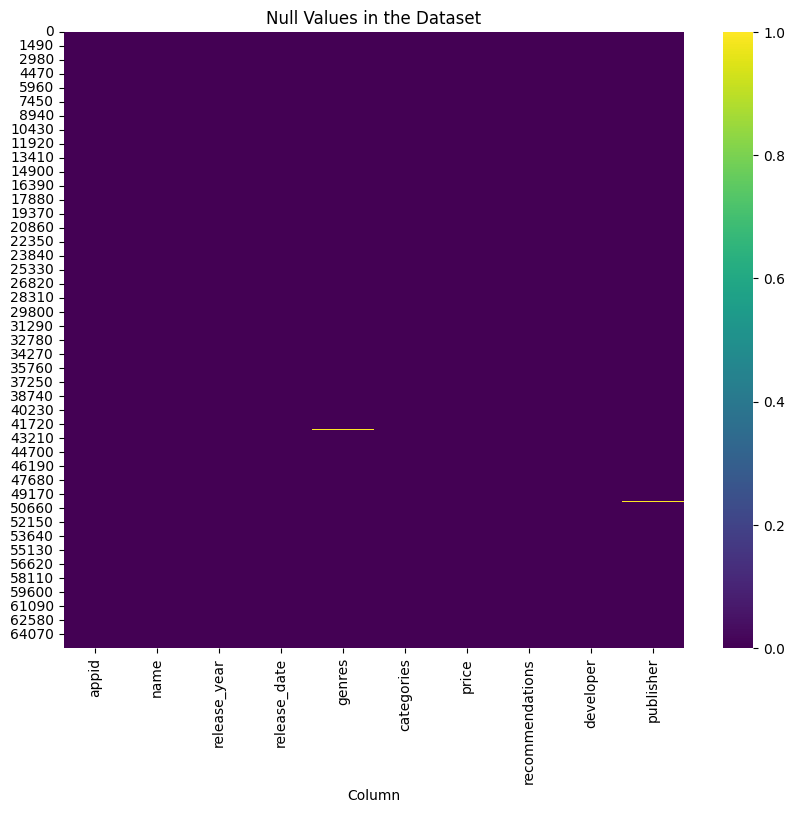

In [211]:
plt.figure(figsize=(10, 8))
plt.title("Null Values in the Dataset")
sns.heatmap(df.isnull(), cmap="viridis")
plt.xlabel("Column")
plt.show()

Convert type data to datetime from release_date column

In [212]:
# drop columns that are not needed
df = df.drop(columns="release_year", axis=1)

# Convert release_date to datetime
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce", format="%b %d, %Y")

Splitting into numerical and categorical

In [213]:
# Split data into numerical anda categorical
numerical = df.select_dtypes(include="number").columns
categorical = df.select_dtypes(include="object").columns

print(f"Numerical columns: {numerical}")
print(f"Categorical columns: {categorical}")

Numerical columns: Index(['appid', 'price', 'recommendations'], dtype='object')
Categorical columns: Index(['name', 'genres', 'categories', 'developer', 'publisher'], dtype='object')


In [214]:
# fill missing values with the mode
for col in categorical:
    df[col] = df[col].fillna(df[col].mode()[0])

# remove NAT values
df.dropna(subset=["release_date"], inplace=True)

In [215]:
# Check missing values again, after fix
df.isnull().sum()

appid              0
name               0
release_date       0
genres             0
categories         0
price              0
recommendations    0
developer          0
publisher          0
dtype: int64

Check duplicated values

In [216]:
print(f"Total Duplicated : {df.duplicated().sum()}")

Total Duplicated : 0


Univariate Analysis

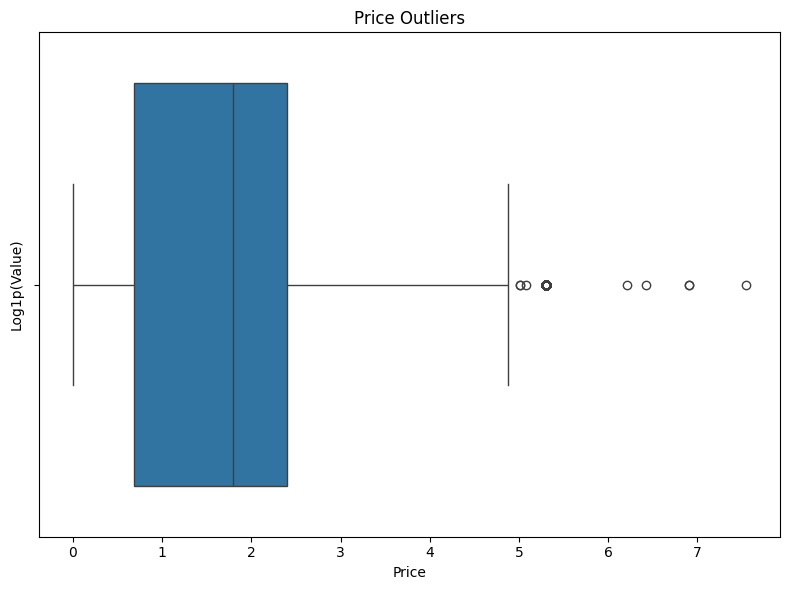

In [217]:
plt.figure(figsize=(8, 6))
# Convert column to numeric, coerce errors to NaN
numeric_data = pd.to_numeric(df["price"], errors="coerce")
# Drop NaN for the purpose of plotting and checking
numeric_data = numeric_data.dropna()

# Check if there are any zero or negative values in the column
if (numeric_data <= 0).any():
    # Use np.log1p to handle zero (and negative) values safely
    log_vals = np.log1p(numeric_data)
    sns.boxplot(x=log_vals)
    plt.ylabel("Log1p(Value)")
else:
    sns.boxplot(x=np.log(numeric_data))
    plt.ylabel("Log(Value)")
plt.title("Price Outliers")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

Which genres are growing the fastest in 2025?

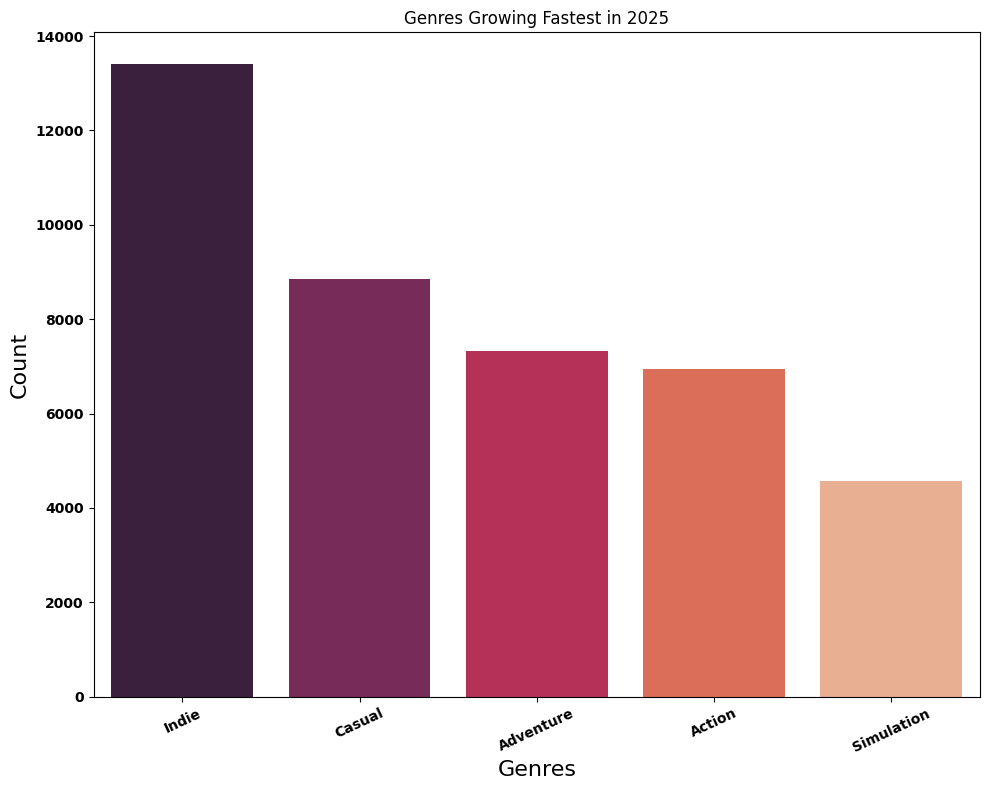

In [218]:
# Get games when release_date on 2025
year_2025 = df[df["release_date"].dt.year == 2025].copy()

# Split genres into a flat list for all games in 2025
all_genres_2025 = year_2025["genres"].dropna().str.split(";").explode()

# Get total games each genres. Show top 5
genres_growing = all_genres_2025.value_counts().sort_values(ascending=False).head()

plt.figure(figsize=(10,8))
plt.title("Genres Growing Fastest in 2025")
sns.barplot(
    x=genres_growing.index, 
    y=genres_growing.values, 
    palette="rocket", 
    hue=genres_growing.index
)
plt.xlabel("Genres", fontsize=16)
plt.xticks(rotation=25, fontweight="bold")
plt.ylabel("Count", fontsize=16)
plt.yticks(fontweight="bold")
plt.tight_layout()
plt.show()

 How has the market share of "Indie" games changed from 2021 to 2025?

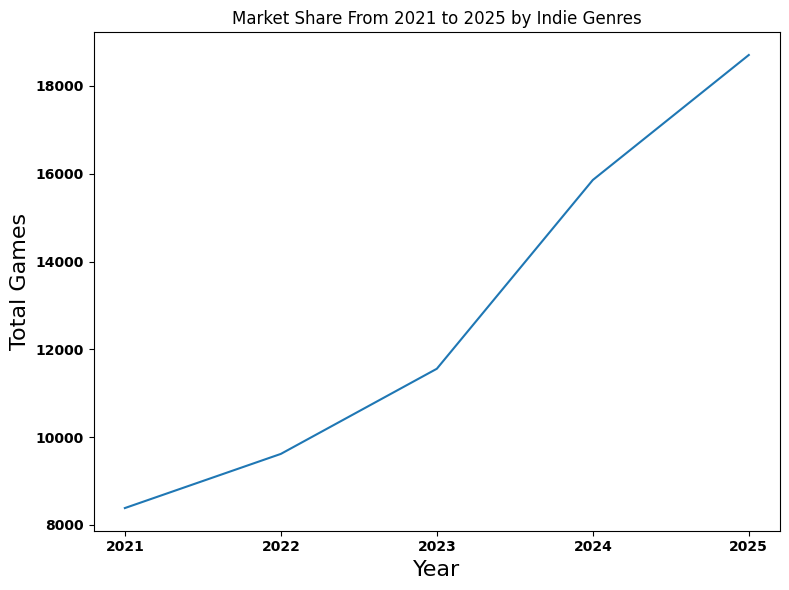

In [219]:
# Filter games released between 2021 and 2025
df_filtered = df[(df["release_date"].dt.year >= 2021) & (df["release_date"].dt.year <= 2025)]

# Set DatetimeIndex for resampling
df_filtered = df_filtered.set_index("release_date")

# Print whether each row has 'Indie' as one of its genres
filtered_indie_games = df_filtered["genres"].apply(lambda x: "Indie" in x.split(";") if isinstance(x, str) else False)

# Count number of games released per year
games_per_year = filtered_indie_games.resample("YS").size().sort_values(ascending=False)

# Rename Of Year Index
new_index_year = [2025, 2024, 2023, 2022, 2021]
games_per_year.index = new_index_year

plt.figure(figsize=(8,6))
plt.title("Market Share From 2021 to 2025 by Indie Genres")
plt.plot(games_per_year.index, games_per_year.values)
plt.xlabel("Year", fontsize=16)
plt.xticks(games_per_year.index, fontweight="bold")
plt.ylabel("Total Games", fontsize=16)
plt.yticks(fontweight="bold")
plt.tight_layout()          
plt.show()

Which months have the highest number of game releases?

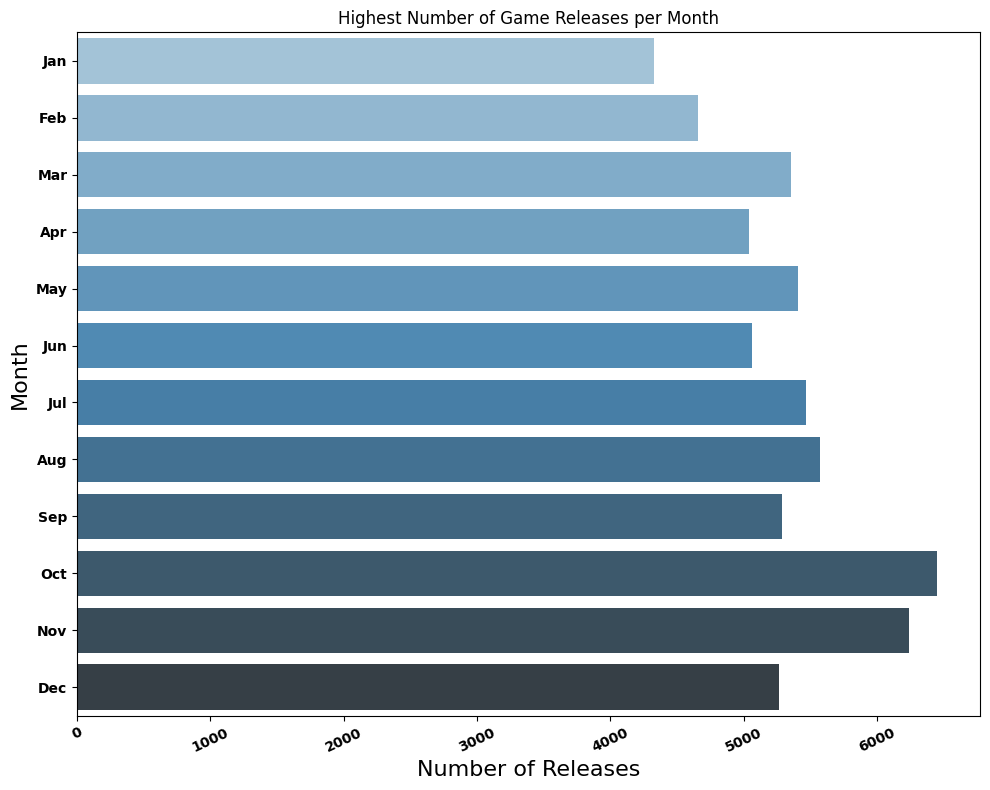

In [220]:
# Count number of games released per month
games_per_month = df["release_date"].dt.month.value_counts().sort_index()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
games_per_month.index = months

plt.figure(figsize=(10,8))
plt.title("Highest Number of Game Releases per Month")
sns.barplot(
    y=games_per_month.index, 
    x=games_per_month.values, 
    palette="Blues_d", 
    hue=games_per_month.index
)
plt.xlabel("Number of Releases", fontsize=16)
plt.xticks(rotation=25, fontweight="bold")
plt.ylabel("Month", fontsize=16)
plt.yticks(fontweight="bold")
plt.tight_layout()
plt.show()

Top 5 Expensive Games

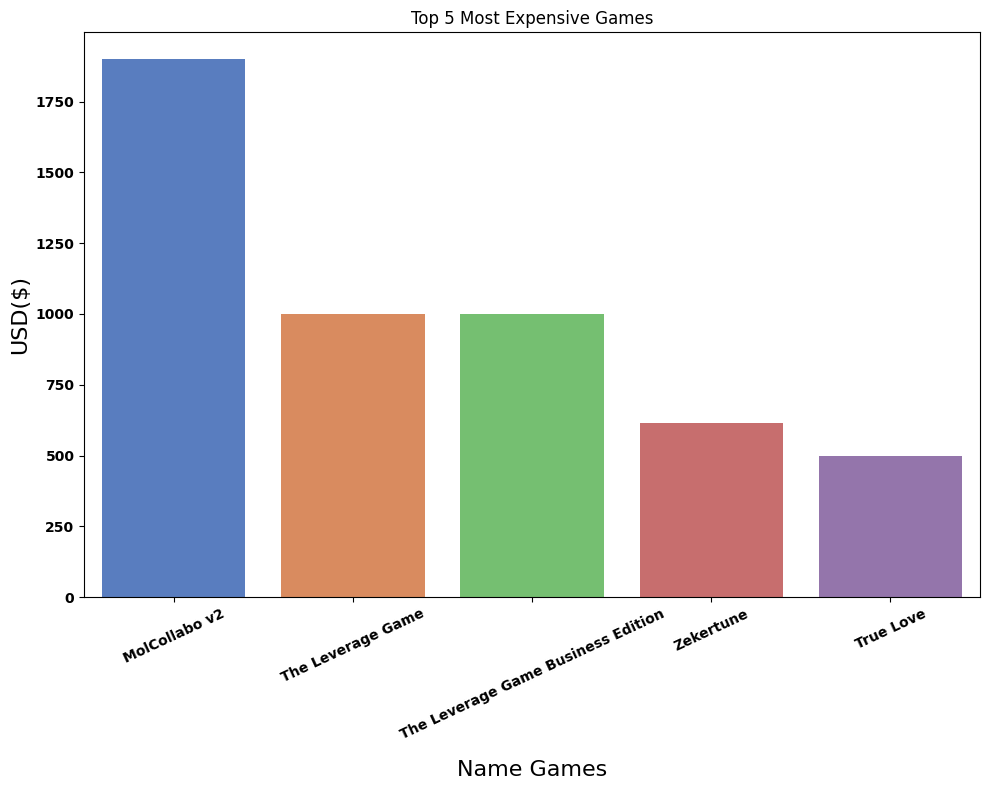

In [221]:
expensive_games = df.sort_values(by="price", ascending=False).head()

plt.figure(figsize=(10,8))
plt.title("Top 5 Most Expensive Games")
sns.barplot(
    x=expensive_games["name"], 
    y=expensive_games["price"],
    palette="muted", 
    hue=expensive_games["name"]
)
plt.xlabel("Name Games", fontsize=16, labelpad=13)
plt.ylabel("USD($)", fontsize=16)
plt.xticks(expensive_games["name"], rotation=25, fontweight="bold")
plt.yticks(fontweight="bold")
plt.tight_layout()
plt.show()

Average total genres by price


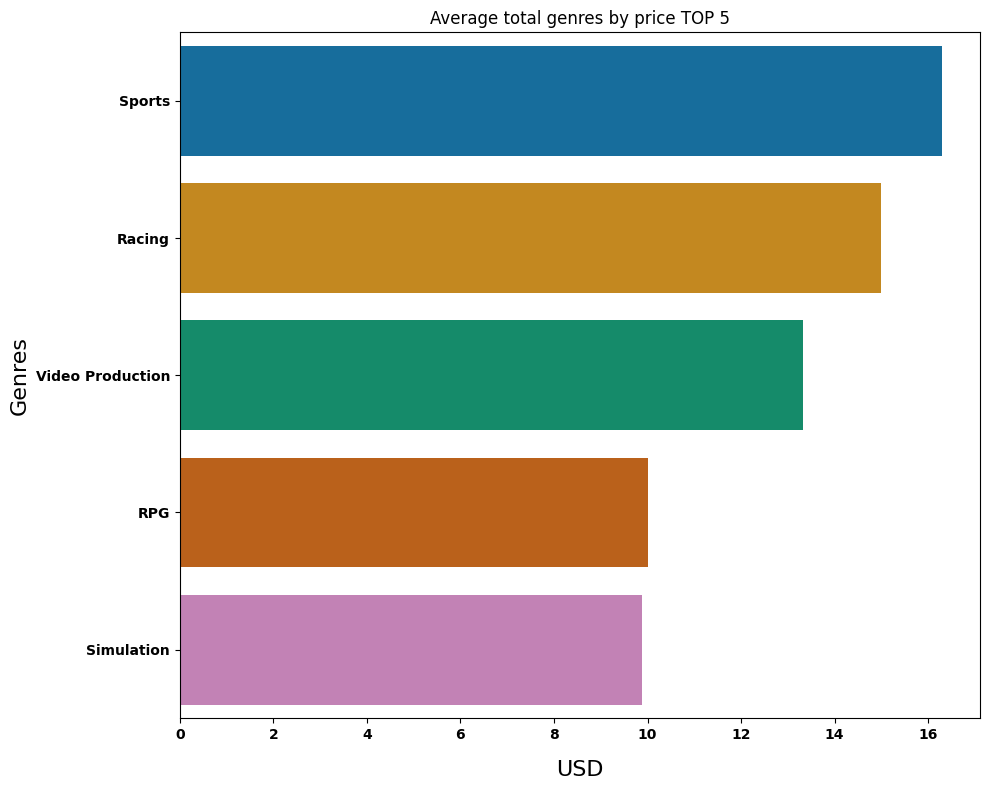

In [222]:
# Copy dataframe
split_genres = df.copy()

# Split each genres
split_genres["genres"] = split_genres["genres"].dropna().str.split(";")
split_genres = split_genres.explode("genres")

# Calcuations of each genres after separated, sort by price
total_price_by_genres = split_genres.groupby("genres")["price"].mean().sort_values(ascending=False).head()

plt.figure(figsize=(10,8))
plt.title("Average total genres by price TOP 5")
sns.barplot(
    y=total_price_by_genres.index, 
    x=total_price_by_genres.values,
    palette="colorblind", 
    hue=total_price_by_genres.index
)
plt.xlabel("USD", fontsize=16, labelpad=13)
plt.ylabel("Genres", fontsize=16)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.tight_layout()
plt.show()

Pricing Strategy: Is there a correlation between price and user recommendations?

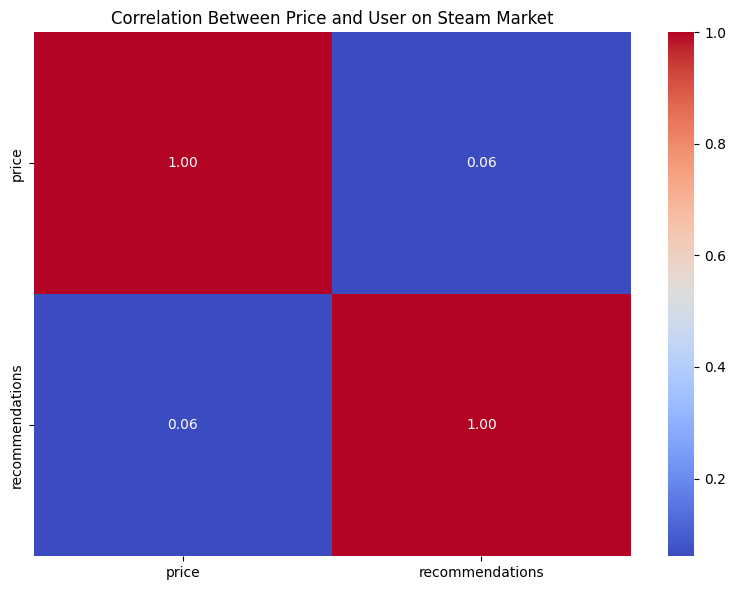

In [223]:
cols = ["price", "recommendations"]
correlation = df[cols].corr()

plt.figure(figsize=(8,6))
plt.title("Correlation Between Price and User on Steam Market")
sns.heatmap(correlation, cmap="coolwarm", fmt=".2f", annot=True)
plt.tight_layout()
plt.show()

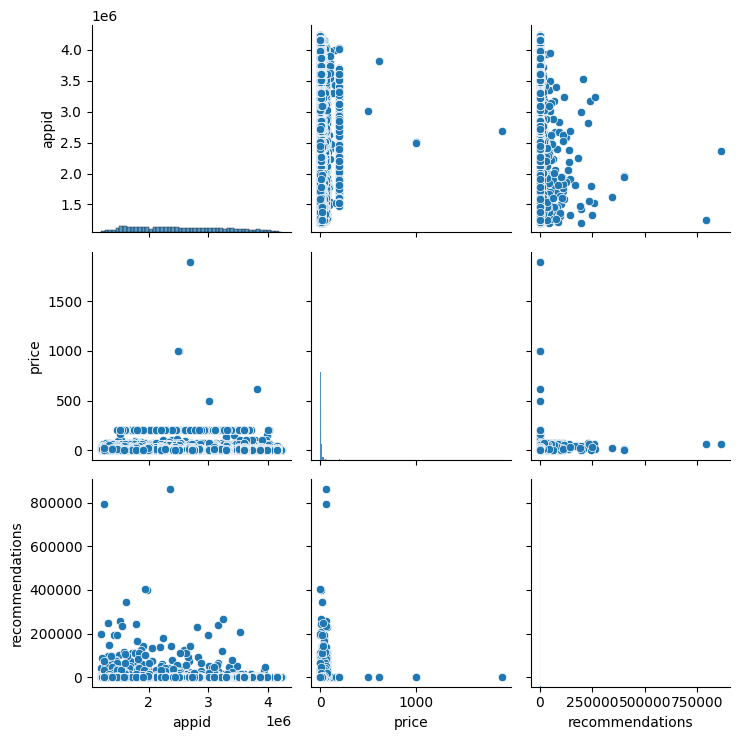

In [224]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

Check Percentage Recommendations Games

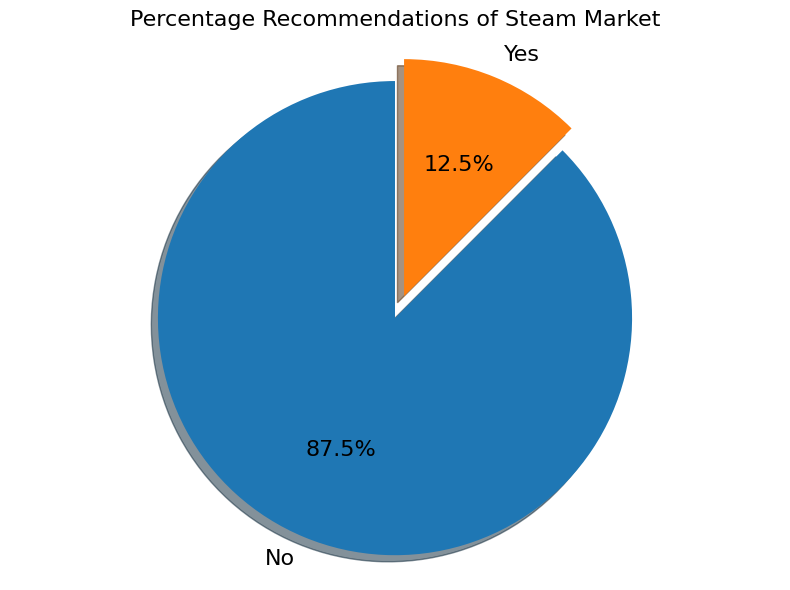

In [225]:
# Encoding recommendations
def check_recommendations(recommendations):
    return "No" if recommendations == 0 else "Yes"
df["recommendations"] = df["recommendations"].apply(check_recommendations)

# Get total values commendations
recommend_counts = df["recommendations"].value_counts()

plt.figure(figsize=(8,6))
plt.title("Percentage Recommendations of Steam Market", fontsize=16)
plt.pie(
    recommend_counts.values, 
    labels=recommend_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    explode=(0,0.1),
    shadow=True,
    textprops={"fontsize":16, "color":"black"}
)
plt.axis("equal")
plt.tight_layout()
plt.show()

Separate Categories and Genres

In [226]:
df_games = df.copy()

# Split and explode, which has a many values from each columns
def split_and_explode(df, column, fill_value="unknown"):
    temp = df[["appid", column]].copy()
    temp[column] = temp[column].fillna(fill_value).astype(str).str.split(";")
    temp = temp.explode(column)
    return temp

publisher_games = split_and_explode(df_games, "publisher")
categories_games = split_and_explode(df_games, "categories")
genres_games = split_and_explode(df_games, "genres")

df_games = df_games.drop(columns=["categories", "genres", "publisher"])

In [227]:
df_games.head()

,appid,name,release_date,price,recommendations,developer
0,3057270,Seafarer's Gambit,2024-07-05,3.99,No,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025-07-25,7.99,No,Caramelo Studios
2,3216640,The Beast and the Princess,2025-06-17,12.99,No,Libragames
3,2403620,Air Twister,2023-11-10,24.99,No,YS Net
4,1538040,Horde Slayer,2021-03-19,3.99,No,Wagner Rodrigues


Exports to SQL

In [ ]:
# Configuration: Use environment variables for sensitive info when possible
server = os.getenv('SQL_SERVER', 'localhost')
database = os.getenv('SQL_DATABASE', 'steam_market')
username = os.getenv('SQL_USERNAME', None)
password = os.getenv('SQL_PASSWORD', None)
use_trusted_connection = False if username and password else True

if use_trusted_connection:
    # Trusted connection (Windows Authentication)
    params = urllib.parse.quote_plus(
        f"DRIVER={{ODBC Driver 17 for SQL Server}};"
        f"SERVER={server};"
        f"DATABASE={database};"
        "Trusted_Connection=yes;"
    )
else:
    # SQL Authentication
    params = urllib.parse.quote_plus(
        f"DRIVER={{ODBC Driver 17 for SQL Server}};"
        f"SERVER={server};"
        f"DATABASE={database};"
        f"UID={username};"
        f"PWD={password};"
        "Trusted_Connection=no;"
    )

# For convert text not recognized
dtype_char = NVARCHAR(None)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")
try:
    df_games.to_sql("games", engine, if_exists="replace", index=False, dtype={
        'name': dtype_char,
        'developer': dtype_char
    })
    categories_games.to_sql("categories", engine, if_exists="replace", index=False, dtype={
        'pubsliher': dtype_char
    })
    genres_games.to_sql("genres", engine, if_exists="replace", index=False, dtype={
        'genres': dtype_char
    })
    publisher_games.to_sql("publisher", engine, if_exists="replace", index=False, dtype={
        'publisher': dtype_char
    })
    print("Tables exported to SQL successfully.")
except Exception as e:
    print(f"Error exporting tables to SQL: {e}")

Tables exported to SQL successfully.


## Insight


From the existing analysis, it can be concluded that the game market on Steam between 2021 and 2025 has seen a significant increase in the number of games released, and the average genres that dominate in the market are Sports, Racing, Video Production, RPG, Simulation. The most expensive game on Steam is MolCollabo V2 at $1900, and 87.5% of the games are not recommended, perhaps because they are not fun or because people are lazy to review them. The month with the most game releases between 2021 and 2025 is October with 6449.